# Project 1: Retail Transaction Data Cleaning and Analysis

## Objective
The objective of this project is to clean a raw dataset and extract meaningful insights using python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('retail_store_sales.csv')

In [4]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


### First Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


### Column Name Standardization
Column names are converted to lowercase with underscores for readability and consistency.

In [7]:
df.columns=(df.columns.str.strip().str.lower().str.replace(' ','_'))
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

### Datatype Fixing
Transaction date is converted from object to datetime format for time-based analysis.

In [8]:
df['transaction_date'] = pd.to_datetime(
    df['transaction_date'].str.strip(),
    errors='coerce'
)

In [9]:
df['transaction_date'].isna().sum()

np.int64(0)

### Missing Value Investigation
Before filling missing values, we analyse whether key numerical fields are missing together.

In [10]:
df[['price_per_unit','quantity','total_spent']].isna().sum()

price_per_unit    609
quantity          604
total_spent       604
dtype: int64

In [11]:
df[df['total_spent'].isna()][['price_per_unit','quantity','total_spent']].head()

,price_per_unit,quantity,total_spent
7,33.5,NaN,NaN
15,24.5,NaN,NaN
19,35.0,NaN,NaN
25,39.5,NaN,NaN
34,23.0,NaN,NaN


### Logical Validation of 'total_spent'
We verify whether total_spent matches price_per_unit * quantity

In [12]:
df['calculated_total']=df['price_per_unit']*df['quantity']

In [13]:
df[['total_spent','calculated_total']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_spent       11971 non-null  float64
 1   calculated_total  11362 non-null  float64
dtypes: float64(2)
memory usage: 196.6 KB


### Handling Missing Numerical Values
- total_spent is recalculated where price and quantity are available.
- Remaining missing values are removed.

In [14]:
df['total_spent']=df['total_spent'].fillna(df['calculated_total'])

In [15]:
df=df.dropna(subset=['price_per_unit','quantity','total_spent'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    11362 non-null  object        
 1   customer_id       11362 non-null  object        
 2   category          11362 non-null  object        
 3   item              11362 non-null  object        
 4   price_per_unit    11362 non-null  float64       
 5   quantity          11362 non-null  float64       
 6   total_spent       11362 non-null  float64       
 7   payment_method    11362 non-null  object        
 8   location          11362 non-null  object        
 9   transaction_date  11362 non-null  datetime64[ns]
 10  discount_applied  7579 non-null   object        
 11  calculated_total  11362 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 1.1+ MB


In [17]:
df.isna().sum()

transaction_id         0
customer_id            0
category               0
item                   0
price_per_unit         0
quantity               0
total_spent            0
payment_method         0
location               0
transaction_date       0
discount_applied    3783
calculated_total       0
dtype: int64

### Handling Missing Categorical Values
- Missing discount information is treated as 'False'(No Discount).

In [18]:
df['discount_applied'] = df['discount_applied'].fillna(False)
df = df.infer_objects(copy=False)


In [19]:
df.head()

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,calculated_total
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,185.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,261.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,43.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False,247.5
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,87.5


### Removing Helper Column

In [20]:
df=df.drop(columns=['calculated_total'])

### Feature Engineering
Months and day of week are extracted from transaction date.

In [21]:
df['month_num'] = df['transaction_date'].dt.month
df['month']=df['transaction_date'].dt.month_name()
df['day_of_week']=df['transaction_date'].dt.day_name()

In [22]:
df.head()

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,month_num,month,day_of_week
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,4,April,Monday
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,7,July,Sunday
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,10,October,Wednesday
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False,5,May,Saturday
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,10,October,Sunday


### Sales Analysis
We analyze sales trends and customeer behaviour.

In [23]:
monthly_sales = (
    df.groupby(['month_num', 'month'])['total_spent']
      .sum()
      .reset_index()
      .sort_values('month_num')
      .set_index('month')
)

In [24]:
monthly_sales

,month_num,total_spent
month,,
January,1,165611.0
February,2,113153.5
March,3,115386.0
April,4,118933.5
May,5,119569.5
June,6,123969.0
July,7,124328.5
August,8,116875.5
September,9,122256.0


In [25]:
df=df.drop(columns=['month_num'])

In [26]:
monthly_sales=monthly_sales.drop(columns=['month_num'])

In [27]:
monthly_sales

,total_spent
month,
January,165611.0
February,113153.5
March,115386.0
April,118933.5
May,119569.5
June,123969.0
July,124328.5
August,116875.5
September,122256.0


In [28]:
months=monthly_sales.index

##### Monthly Sales Trend

<Figure size 1280x960 with 0 Axes>

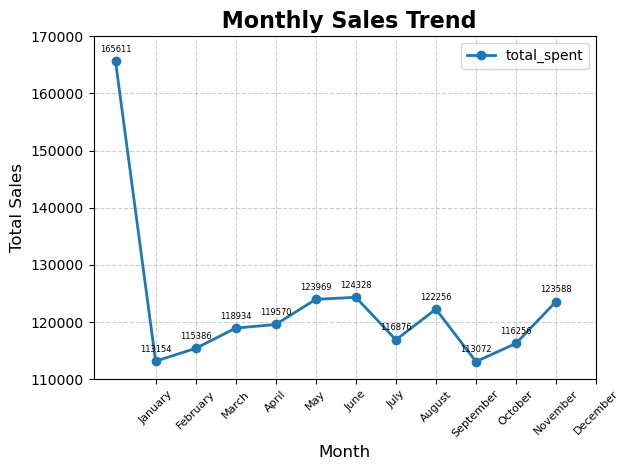

In [29]:
plt.figure(dpi=200)
monthly_sales.plot(kind='line',marker='o',
    linewidth=2)
plt.title(' Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(1,13),labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
],fontsize=8,rotation=45)
plt.yticks(range(110000,180000,10000))
for i, value in enumerate(monthly_sales.values):
    value = float(value)  
    plt.text(
        i,  
        value + monthly_sales.max() * 0.01, 
        f'{value:.0f}',  
        ha='center',
        fontsize=6
        
    )
plt.tight_layout()    
plt.show()


## Key Insights
- January records the highest sales, indicating strong start-of-year and stock-up purchasing behavior by customers.
- October shows the lowest sales, suggesting a temporary slowdown or postponed purchases.
- Sales remain largely stable across most months, reflecting consistent demand for essential products.
- A gradual increase from March to July highlights steady repeat purchases and regular consumption patterns
- Post-October recovery in November and December suggests festive-season influence and promotion-driven buying.
- Customer behavior shifts from bulk buying to routine replenishment after January, indicating predictable and need-based purchasing throughout the year.

## Conclusion
This project demonstrates how structured exploratory analysis can extract meaningful insights from raw retail transaction data. The focus was on clarity, correctness, and ethical handling of missing data rather than aggressive assumptions.

The project establishes a strong foundation in data cleaning, aggregation, and visualization using Python.